# Model Training

> ## Importing packages

In [38]:
import numpy as np
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense,Flatten, Dropout
from tensorflow.keras.layers import Conv2D,MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator

> ## Image Data Argumentation - Generate new data from existing data

In [39]:
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

> ## Loading Our Data And Perform Data Argumentation

In [40]:
x_train = train_datagen.flow_from_directory(r'../input/gesture-images/train', target_size=(64, 64), batch_size=3, color_mode='grayscale', class_mode='categorical')
x_test = test_datagen.flow_from_directory(r'../input/gesture-images/test', target_size=(64, 64), batch_size=3, color_mode='grayscale', class_mode='categorical')

Found 594 images belonging to 6 classes.
Found 30 images belonging to 6 classes.


In [41]:
print(x_train.class_indices)

{'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5}


> ## Initializing The Model

In [42]:
model=Sequential()

> ## Adding CNN Layers

In [43]:
model.add(Conv2D(32, (3, 3), input_shape=(64, 64, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [44]:
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [45]:
model.add(Flatten())

> ## Adding Dense Layers

In [46]:
model.add(Dense(units=512, activation='relu'))

In [47]:
model.add(Dense(units=6, activation='softmax'))

In [48]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 62, 62, 32)        320       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               3211776   
_________________________________________________________________
dense_3 (Dense)              (None, 6)                

> ## Configure The Learning Process

In [49]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

> ## Train The Model

In [50]:
model.fit_generator(x_train,
                    steps_per_epoch =594/3,
                    epochs=25,
                    validation_data=x_test,
                    validation_steps=30/3)

Epoch 1/25
198/198 [==============================] - 3s 16ms/step - loss: 1.2882 - accuracy: 0.5236 - val_loss: 0.8782 - val_accuracy: 0.6000
Epoch 2/25
198/198 [==============================] - 3s 14ms/step - loss: 0.5626 - accuracy: 0.7845 - val_loss: 0.3931 - val_accuracy: 0.9333
Epoch 3/25
198/198 [==============================] - 3s 15ms/step - loss: 0.3859 - accuracy: 0.8434 - val_loss: 0.4664 - val_accuracy: 0.8333
Epoch 4/25
198/198 [==============================] - 3s 14ms/step - loss: 0.2561 - accuracy: 0.9040 - val_loss: 0.3829 - val_accuracy: 0.9333
Epoch 5/25
198/198 [==============================] - 3s 14ms/step - loss: 0.2199 - accuracy: 0.9293 - val_loss: 0.3865 - val_accuracy: 0.9667
Epoch 6/25
198/198 [==============================] - 3s 14ms/step - loss: 0.1806 - accuracy: 0.9310 - val_loss: 0.3048 - val_accuracy: 0.9333
Epoch 7/25
198/198 [==============================] - 3s 15ms/step - loss: 0.1316 - accuracy: 0.9512 - val_loss: 0.2590 - val_accuracy: 0.9667

> ## Save The Model

In [51]:
model.save('gesture.h5')

In [53]:
model_json = model.to_json()
with open("model-bw.json", "w") as json_file:
     json_file.write(model_json)

#  Model Testing

In [56]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
model = load_model("gesture.h5")

In [58]:
img = image.load_img(r'../input/gesture-images/test/1/1.jpg', grayscale=True, target_size=(64,64))
x = image.img_to_array(img)
x.shape

(64, 64, 1)

In [59]:
x = np.expand_dims(x,axis=0)
x.shape

(1, 64, 64, 1)

In [60]:
pred_x = model.predict(x)
pred_x=np.argmax(pred_x,axis=1)
pred_x

array([1])

In [61]:
index=['0', '1', '2', '3', '4', '5']
result=str(index[pred_x[0]])
result

'1'

In [62]:
import numpy as np
p=[]
for i in range(0,6):
  for j in range(0,5):
    img = image.load_img(r"../input/gesture-images/test//"+str(i)+"//"+str(j)+".jpg", grayscale=True, target_size=(64,64))
    x = image.img_to_array(img)
    x = np.expand_dims(x,axis=0)
    pred = np.argmax(model.predict(x),axis=-1)
    p.append(pred)
print(p)

[array([0]), array([0]), array([0]), array([0]), array([0]), array([1]), array([1]), array([1]), array([1]), array([1]), array([2]), array([2]), array([1]), array([2]), array([2]), array([3]), array([3]), array([3]), array([3]), array([3]), array([4]), array([4]), array([3]), array([4]), array([4]), array([5]), array([5]), array([5]), array([5]), array([5])]


In [63]:
result = []
index=['0','1','2','3','4','5']
for i in p:
  result.append(index[i[0]])
print(result)

['0', '0', '0', '0', '0', '1', '1', '1', '1', '1', '2', '2', '1', '2', '2', '3', '3', '3', '3', '3', '4', '4', '3', '4', '4', '5', '5', '5', '5', '5']


Populating the interactive namespace from numpy and matplotlib


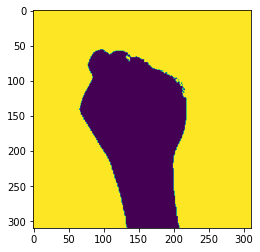

In [82]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
imgs = mpimg.imread(r"../input/gesture-images/test/0/0.jpg")
imgplot = plt.imshow(imgs)
plt.show()

Populating the interactive namespace from numpy and matplotlib


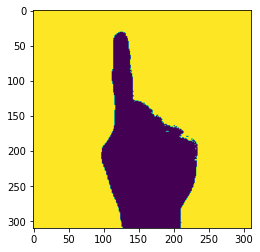

In [66]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
imgs = mpimg.imread(r"../input/gesture-images/test/1/0.jpg")
imgplot = plt.imshow(imgs)
plt.show()

Populating the interactive namespace from numpy and matplotlib


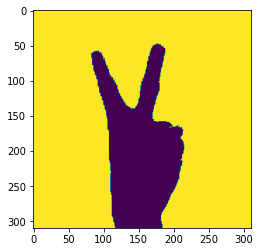

In [67]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
imgs = mpimg.imread(r"../input/gesture-images/test/2/0.jpg")
imgplot = plt.imshow(imgs)
plt.show()

Populating the interactive namespace from numpy and matplotlib


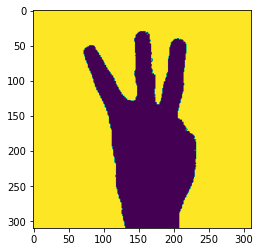

In [68]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
imgs = mpimg.imread(r"../input/gesture-images/test/3/0.jpg")
imgplot = plt.imshow(imgs)
plt.show()

Populating the interactive namespace from numpy and matplotlib


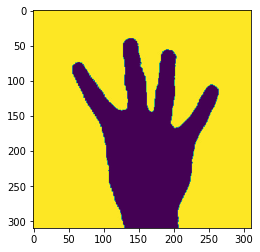

In [69]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
imgs = mpimg.imread(r"../input/gesture-images/test/4/0.jpg")
imgplot = plt.imshow(imgs)
plt.show()

Populating the interactive namespace from numpy and matplotlib


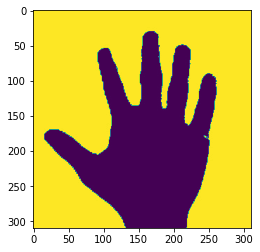

In [75]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
imgs = mpimg.imread(r"../input/gesture-images/test/5/0.jpg")
imgplot = plt.imshow(imgs)
plt.show()